### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [11]:
complains=pd.read_csv('311-service-requests.csv', dtype='unicode')
complains

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"


# 2. What's even in it? (the summary)


In [12]:
complains.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [13]:
complains.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [14]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [15]:
complains.sample(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
17780,26572982,10/27/2013 01:37:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10013,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.717677983756516,-74.00577906853832,"(40.717677983756516, -74.00577906853832)"
97769,26456159,10/08/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,10453,1760 MONTGOMERY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.85072196157378,-73.91811429554205,"(40.85072196157378, -73.91811429554205)"
78268,26478412,10/13/2013 09:09:51 AM,10/13/2013 09:48:15 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11214,62 BAY 32 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.599915919967366,-73.9935181171616,"(40.599915919967366, -73.9935181171616)"
86190,26468393,10/10/2013 11:12:42 AM,10/10/2013 05:55:57 PM,FDNY,Bureau of Fire Prevention - Highrise Unit - In...,Fire Safety Director - F58,On Site Test,Street Address,10005,60 WALL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70591375642571,-74.00860936465871,"(40.70591375642571, -74.00860936465871)"
58809,26500702,10/18/2013 01:28:43 AM,10/18/2013 04:31:53 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11411,117-01 SPRINGFIELD BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6960932034455,-73.74362116515917,"(40.6960932034455, -73.74362116515917)"


## spaces in column names are replaced with ‘_’

In [16]:
complains.columns =[column.replace(" ", "_")  for column in complains.columns]

# 3. Convert the data time columns in the data set from object to datetime format

In [17]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

In [18]:
complains['Created_Date']=pd.to_datetime(complains['Created_Date'])

In [19]:
complains['Closed_Date']=pd.to_datetime(complains['Closed_Date'])

In [20]:
complains['Due_Date']=pd.to_datetime(complains['Due_Date'])

In [21]:
complains['Resolution_Action_Updated_Date']=pd.to_datetime(complains['Resolution_Action_Updated_Date'])

# 4. Drop all the columns where most of the rows are null. Think logically

In [22]:
complains.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                        26637
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                        8822
City                               12215
Landmark                          110974
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(St

In [25]:
complains.drop(['Landmark', 'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location', 'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Terminal_Name'],axis=1, inplace=True)

In [26]:
complains.sample()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
95247,26459965,2013-10-08 13:15:32,2013-10-11 16:14:18,DOT,Department of Transportation,Broken Muni Meter,Coin or Card Did Not Register,Street,10016,PARK AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.74678751877648,-73.98155808747941,"(40.74678751877648, -73.98155808747941)"


# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [29]:
complains['Complaint_Type'].nunique()

165

In [31]:
complains['Complaint_Type'].head()

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint_Type, dtype: object

# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [37]:
complains.loc[:10,['Complaint_Type', 'Borough']]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [39]:
complains=complains.rename(columns={'Borough':'District'})

# 8. What's the most common complaint type?
display top 10 most common compalin


In [44]:
top=complains['Complaint_Type'].value_counts().head(10)
top

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

<AxesSubplot:>

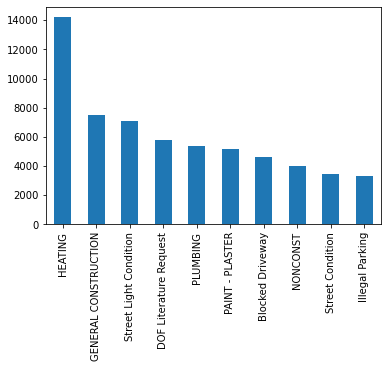

In [45]:
top.plot(kind='bar')

#  Plot the top 10 most common compalin

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [47]:
dist=complains['District'].value_counts().head(6)
dist

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: District, dtype: int64

<AxesSubplot:>

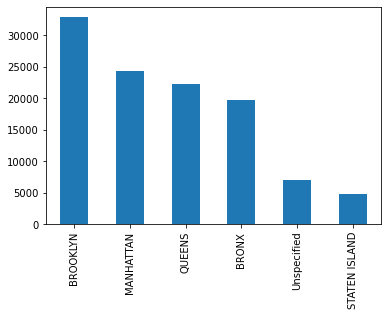

In [61]:
dist.plot(kind='bar')

In [52]:
q1=complains.query('District=="BROOKLYN"').head(10)
q1

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
9,26594392,2013-10-31 01:34:41,2013-10-31 02:23:51,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.66820406598287,-73.95064760056546,"(40.66820406598287, -73.95064760056546)"
10,26595176,2013-10-31 01:25:12,NaT,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11218,3775 18 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.63437840816299,-73.96946177104543,"(40.63437840816299, -73.96946177104543)"
14,26590917,2013-10-31 01:19:54,NaT,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Mixed Use Building,11219,63 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.6264774690411,-73.99921826202639,"(40.6264774690411, -73.99921826202639)"
17,26595117,2013-10-31 00:52:46,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11236,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.63243692394328,-73.88817263437012,"(40.63243692394328, -73.88817263437012)"
18,26590389,2013-10-31 00:51:00,NaT,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,226 42 ST E,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN
20,26592932,2013-10-31 00:43:47,2013-10-31 00:56:20,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11216,778 PARK PLACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.67350473678714,-73.95184414979961,"(40.67350473678714, -73.95184414979961)"
23,26592304,2013-10-31 00:38:00,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11216,371 TOMPKINS AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.6849442562592,-73.94422078036632,"(40.6849442562592, -73.94422078036632)"
26,26590509,2013-10-31 00:33:00,NaT,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,38 ST E,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN
31,26595564,2013-10-31 00:30:36,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"
36,26590262,2013-10-31 00:23:00,NaT,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,40.5817444882428,-73.95383634845487,"(40.5817444882428, -73.95383634845487)"


# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [58]:
new_complaint=complains.query('District=="QUEENS" & Complaint_Type=="Illegal Parking"').head(10)

In [59]:
new_complaint

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
116,26591037,2013-10-30 23:20:57,2013-10-31 02:16:39,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.67347065165803,-73.8511307325341,"(40.67347065165803, -73.8511307325341)"
117,26592954,2013-10-30 23:20:26,2013-10-31 01:18:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.73996897148448,-73.7768682381755,"(40.73996897148448, -73.7768682381755)"
140,26592551,2013-10-30 23:01:49,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.726633034808366,-73.8835552085296,"(40.726633034808366, -73.8835552085296)"
186,26591575,2013-10-30 22:33:28,2013-10-30 23:06:35,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.608860268959695,-73.75593130211928,"(40.608860268959695, -73.75593130211928)"
193,26594762,2013-10-30 22:31:22,2013-10-31 02:28:02,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.78141708195395,-73.84323796414719,"(40.78141708195395, -73.84323796414719)"
253,26592844,2013-10-30 21:46:18,2013-10-30 22:39:09,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.7086929311143,-73.8753699708503,"(40.7086929311143, -73.8753699708503)"
284,26592833,2013-10-30 21:27:13,2013-10-31 00:44:51,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.70241414798045,-73.79252032151341,"(40.70241414798045, -73.79252032151341)"
293,26594635,2013-10-30 21:22:34,2013-10-30 22:29:36,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.75439605091989,-73.77719529050601,"(40.75439605091989, -73.77719529050601)"
319,26592819,2013-10-30 21:10:54,2013-10-31 01:50:30,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.680211769230816,-73.75749088965092,"(40.680211769230816, -73.75749088965092)"


# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [63]:
new_complaint=new_complaint.loc[:, ['Complaint_Type', 'District', 'Created_Date', 'Descriptor']]

# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [64]:
new_complaint.to_csv('new_complaint.csv',index=False)

In [66]:
comnew=pd.read_csv('new_complaint.csv')
comnew

,Complaint_Type,District,Created_Date,Descriptor
0,Illegal Parking,QUEENS,2013-10-31 02:01:04,Commercial Overnight Parking
1,Illegal Parking,QUEENS,2013-10-30 23:20:57,Blocked Hydrant
2,Illegal Parking,QUEENS,2013-10-30 23:20:26,Posted Parking Sign Violation
3,Illegal Parking,QUEENS,2013-10-30 23:01:49,Commercial Overnight Parking
4,Illegal Parking,QUEENS,2013-10-30 22:33:28,Commercial Overnight Parking
5,Illegal Parking,QUEENS,2013-10-30 22:31:22,Commercial Overnight Parking
6,Illegal Parking,QUEENS,2013-10-30 21:46:18,Commercial Overnight Parking
7,Illegal Parking,QUEENS,2013-10-30 21:27:13,Blocked Sidewalk
8,Illegal Parking,QUEENS,2013-10-30 21:22:34,Commercial Overnight Parking
9,Illegal Parking,QUEENS,2013-10-30 21:10:54,Commercial Overnight Parking
